# `Supervised Machine Learning`

### `Regression` predicting the value of dependent variable on the basis of independent variable

### `Classification` predicting a category  class or labeling data using input features

### `Recommandation` finding similarity between items & users to recommand better product

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 300

`sigmoid or logit function` which produce `s-shape curve` such that values lie in 0-1, best for binary classification

$$ sigmoid = \frac {1} {1+e^{-z} }$$

$$Regression  \quad \quad \hat y \quad = \quad \beta_0 + \beta_1 X_1$$



$$ \text {logistic regression} = \frac {1} {1\quad+\quad e^{-(\beta_0+ \beta_1X_1)}} $$

### `Binary Classification`

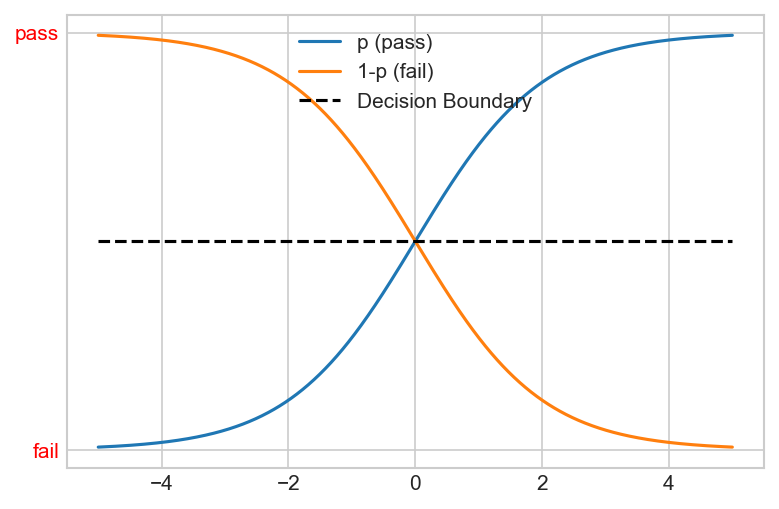

In [3]:
data = np.linspace(-5, 5, 1000)
sig = 1 / (1+np.exp(-data))
plt.figure(dpi=150)
plt.plot(data, sig, label='p (pass)')
plt.plot(data, 1-sig, label='1-p (fail)')
plt.yticks([0, 1], ['fail', 'pass'], color='red')
plt.plot([-5, 5],  [ 0.5, 0.5], 'k--', ms=10, label='Decision Boundary')
plt.legend(loc=9)
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer


`Malignant`

`Benign`

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
features = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [10]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
#print(cancer['DESCR'])

In [13]:
target = pd.Series(cancer['target'], name='cancer type')

In [15]:
target.unique()

array([0, 1], dtype=int64)

In [16]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [17]:
map_dict = { 0:'malignant', 1: 'benign'}

In [18]:
map_dict

{0: 'malignant', 1: 'benign'}

In [19]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scalar = StandardScaler()

In [23]:
scalar.fit(features) # training of scaling model

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
scaled_features = pd.DataFrame(scalar.transform(features), columns=cancer['feature_names'])

In [28]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
scaled_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


##### Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model = LogisticRegression()

### Train test split to get test for evaluation

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2)

In [34]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
225,0.060412,-1.354271,0.022283,-0.038933,0.192127,-0.532555,-0.396226,-0.074523,0.961590,-1.179108,...,0.103709,-1.429316,0.093491,-0.012979,-0.116980,-0.647368,-0.522875,-0.089932,0.260858,-1.287078
516,1.187949,0.300273,1.187553,1.129424,0.742947,0.387729,0.855002,1.175970,0.176638,-0.480229,...,1.157759,0.085131,1.040681,1.076575,0.737820,-0.004231,0.497558,0.554153,0.280271,-0.294580
298,0.037691,-0.260550,-0.030853,-0.061970,-2.177683,-0.988149,-0.804137,-0.907410,-0.644825,-0.983478,...,-0.010186,-0.067942,-0.043523,-0.107027,-1.662195,-0.238966,-0.555018,-0.598500,-0.428317,-0.398208
278,-0.152598,-0.337343,-0.235980,-0.234892,-1.201293,-1.209502,-0.864150,-0.942490,-0.871183,-1.077040,...,-0.159286,0.068847,-0.248748,-0.248715,-1.199727,-1.132615,-0.797293,-0.955564,-0.915269,-1.181233
436,-0.357089,0.058258,-0.383029,-0.414355,-0.355847,-0.483471,-0.889260,-0.722725,0.180289,0.095318,...,-0.376722,-0.211245,-0.361040,-0.445953,-0.480818,-0.566578,-0.963911,-0.772997,0.666921,-0.365513


In [35]:
y_train.head()

225    1
516    0
298    1
278    1
436    1
Name: cancer type, dtype: int32

### Training

In [36]:
model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
pred = model.predict(X_test)

In [38]:
pred[:5]

array([1, 1, 1, 1, 1])

In [40]:
y_test[:5].to_numpy()

array([1, 1, 1, 1, 1])

In [41]:
sum(pred)

71

In [42]:
sum(y_test) # 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, --> 5

72

In [43]:
pred.shape

(114,)

In [46]:
(113/114)*100 # accuracy of our model ? 

99.12280701754386

In [47]:
from sklearn.metrics import accuracy_score, r2_score

In [50]:
print(round(r2_score(y_test, pred)*100, 2))

96.23


In [53]:
print(round(accuracy_score(y_test, pred)*100, 2))

99.12


In [54]:
new_patient = features[100:102]

In [55]:
new_patient

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
100,13.610,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.0000,0.0000,0.2932,0.09382


In [56]:
new_patient_scaled = scalar.transform(new_patient)

In [57]:
model.predict(new_patient)

array([0, 0])

In [58]:
target[100:102]

100    0
101    1
Name: cancer type, dtype: int32

In [69]:
graph = model.predict_proba(X_test)[:, 0]

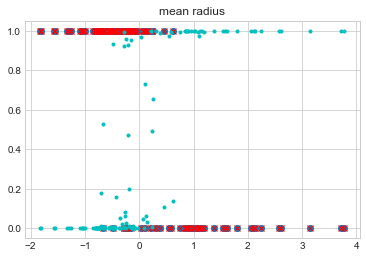

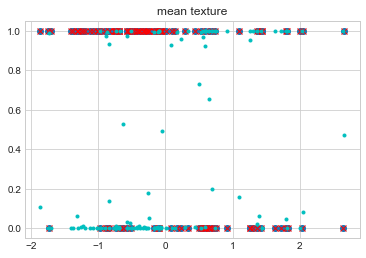

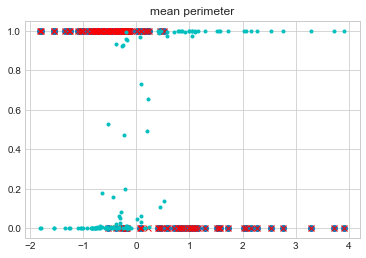

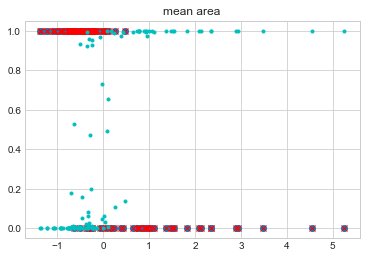

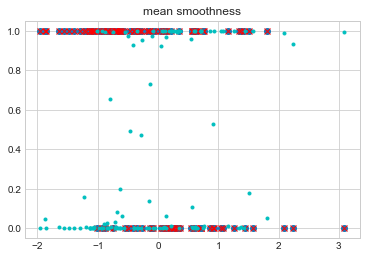

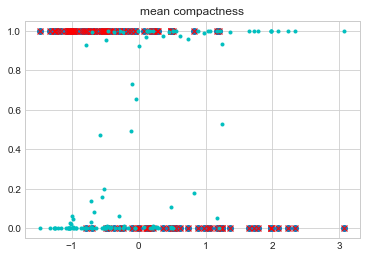

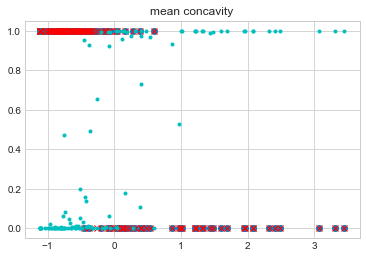

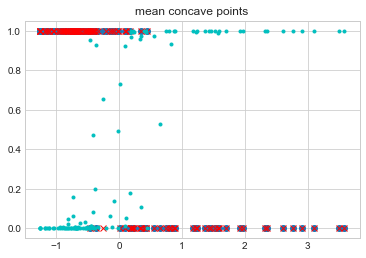

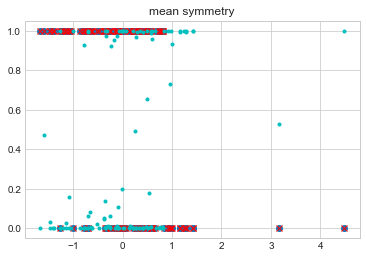

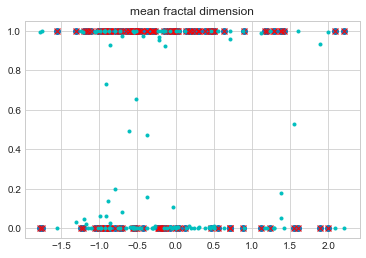

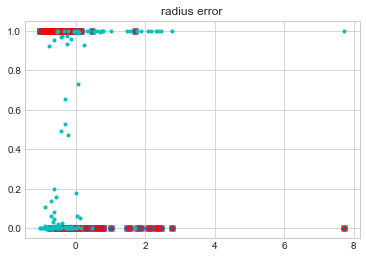

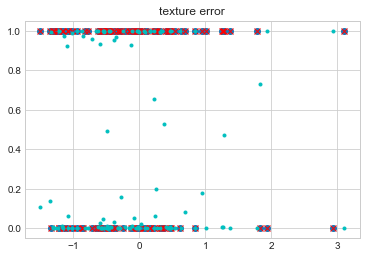

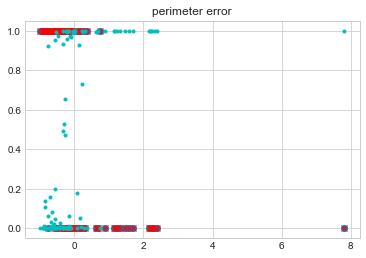

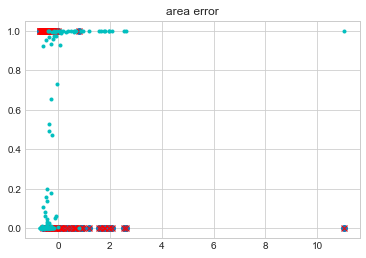

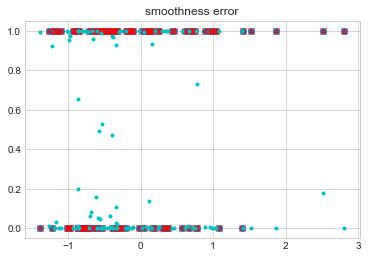

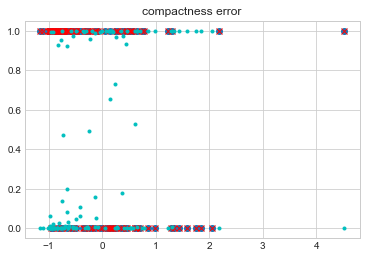

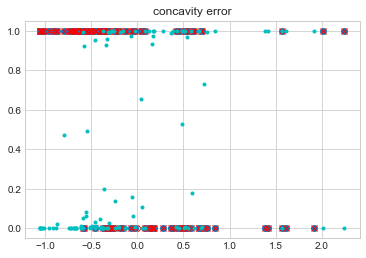

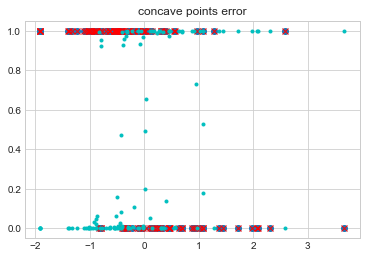

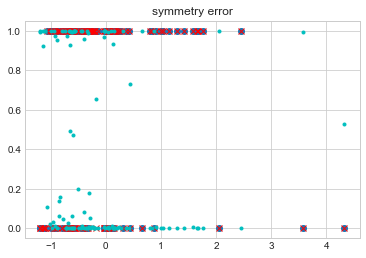

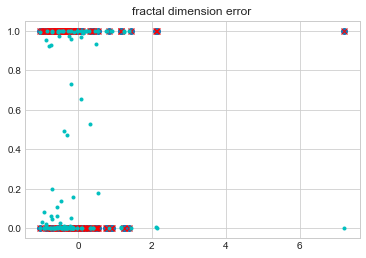

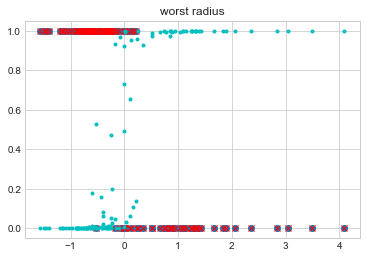

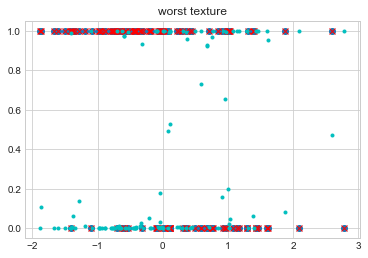

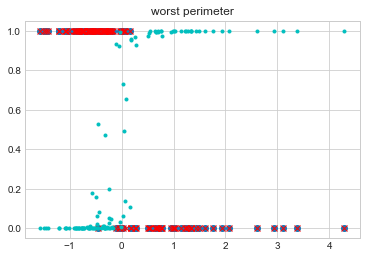

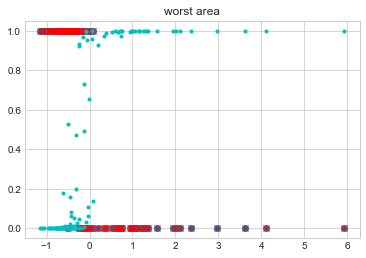

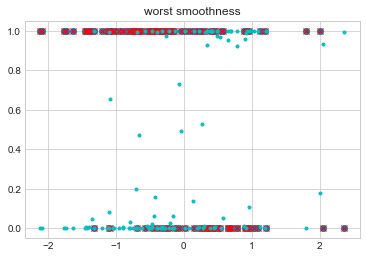

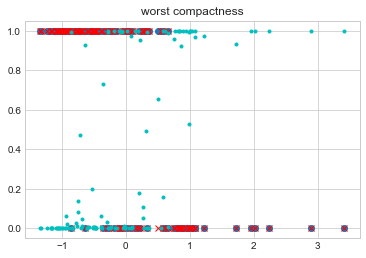

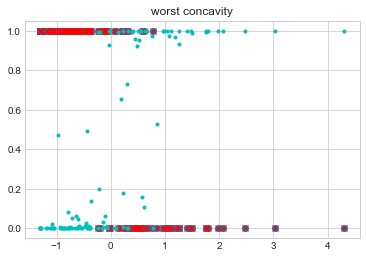

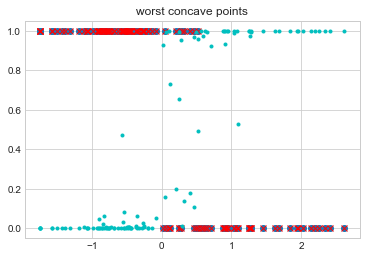

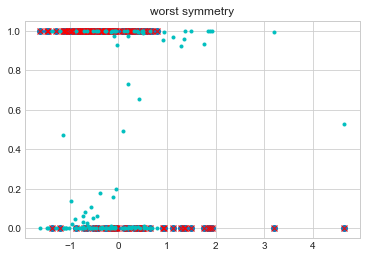

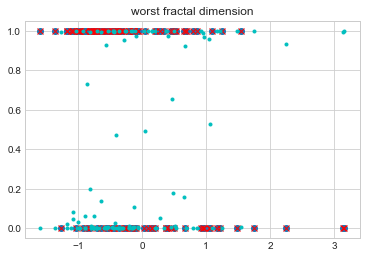

In [70]:
for i in range(X_test.shape[1]):
    plt.scatter(X_test.iloc[:, i], y_test)
    plt.plot(X_test.iloc[:, i], pred, 'rx')
    plt.title(f"{X_test.columns[i]}")
    plt.plot(X_test.iloc[:, i], graph, 'c.')
    plt.show()

In [71]:
14/15

0.9333333333333333

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
print(confusion_matrix(y_test, pred))

[[42  0]
 [ 1 71]]


In [76]:
cnf = pd.DataFrame(confusion_matrix(y_test, pred), columns=['malignant', 'benign'], index=['malignant', 'benign'])

In [77]:
cnf

,malignant,benign
malignant,42,0
benign,1,71


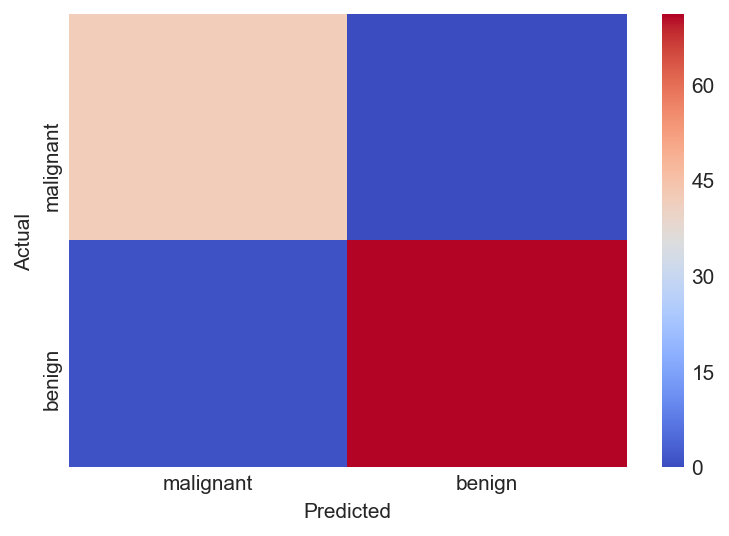

In [83]:
plt.figure(dpi=150)
sns.heatmap(cnf, cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [84]:
print(f"Accuracy : {accuracy_score(y_test, pred)*100:.2f}")

Accuracy : 99.12


In [86]:
print(f"Confusion Matrix\n\n {confusion_matrix(y_test, pred)}")

Confusion Matrix

 [[42  0]
 [ 1 71]]


In [87]:
from sklearn.metrics import classification_report, precision_score

In [88]:
print("Classification Report \n \n ", classification_report(y_test, pred))

Classification Report 
 
                precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.99      0.99        72

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



#### ROC and AUC Curve

__A Classification Project__

### Logistic Regression

__step1__ load data

![Iris](https://yculz33w9skgdkhey8rajqm6-wpengine.netdna-ssl.com/wp-content/uploads/2018/11/versicolor.jpg)

Target: Setosa, Versicolor, Verginica

features: sepal_length, sepal_width, petal_length, petal_width

In [92]:
from sklearn.datasets import load_iris

In [93]:
iris = load_iris()

In [94]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [95]:
colnames = list(map(lambda s: s[:-5], iris['feature_names']))

In [96]:
colnames

['sepal length', 'sepal width', 'petal length', 'petal width']

In [97]:
features = pd.DataFrame(iris['data'], columns=colnames)
features.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [99]:
cls_name = iris['target_names']
cls_name

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [100]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [101]:
map_dict = { 0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [102]:
map_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [105]:
map_dict[2]

'virginica'

__step 2__ split data into training and test

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20)

In [108]:
X_train[:5]

,sepal length,sepal width,petal length,petal width
88,5.6,3.0,4.1,1.3
110,6.5,3.2,5.1,2.0
0,5.1,3.5,1.4,0.2
34,4.9,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [111]:
print(*map(lambda value:map_dict[value], y_test[:5]), sep=', ')

virginica, versicolor, setosa, virginica, versicolor


__step3__ model selection

    It is a Multi-nomial Classification problem

In [114]:
from sklearn.linear_model import LogisticRegressionCV

In [120]:
model = LogisticRegressionCV(solver='newton-cg', multi_class='multinomial')

__step4__ model training or learning

In [121]:
model.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)

__step5__ prediction

In [122]:
pred = model.predict(X_test)

In [123]:
pred[:5]

array([2, 1, 0, 2, 1])

In [124]:
y_test[:5]

array([2, 1, 0, 2, 1])

__step6__ Model Evaluation

In [125]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [126]:
print(f"Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}")

Accuracy Score: 100.00


In [127]:
print(f"Confusion Matrix \n\n ", confusion_matrix(y_test, pred))

Confusion Matrix 

  [[ 9  0  0]
 [ 0 11  0]
 [ 0  0 10]]


In [128]:
print(f"Classification Report\n\n", classification_report(y_test, pred))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [129]:
np = model.predict(X_train)
print(f"Classification Report\n\n", classification_report(y_train, np))

Classification Report

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.97      0.97      0.97        39
           2       0.97      0.97      0.97        40

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [130]:
print(f"Confusion Matrix \n\n ", confusion_matrix(y_train, np))

Confusion Matrix 

  [[41  0  0]
 [ 0 38  1]
 [ 0  1 39]]


In [131]:
38/39

0.9743589743589743

In [133]:
cnf = pd.DataFrame(confusion_matrix(y_train, np), columns=['setosa', 'versicolor', 'verginica'],
                   index=['setosa', 'versicolor', 'verginica'] )

In [134]:
cnf

,setosa,versicolor,verginica
setosa,41,0,0
versicolor,0,38,1
verginica,0,1,39


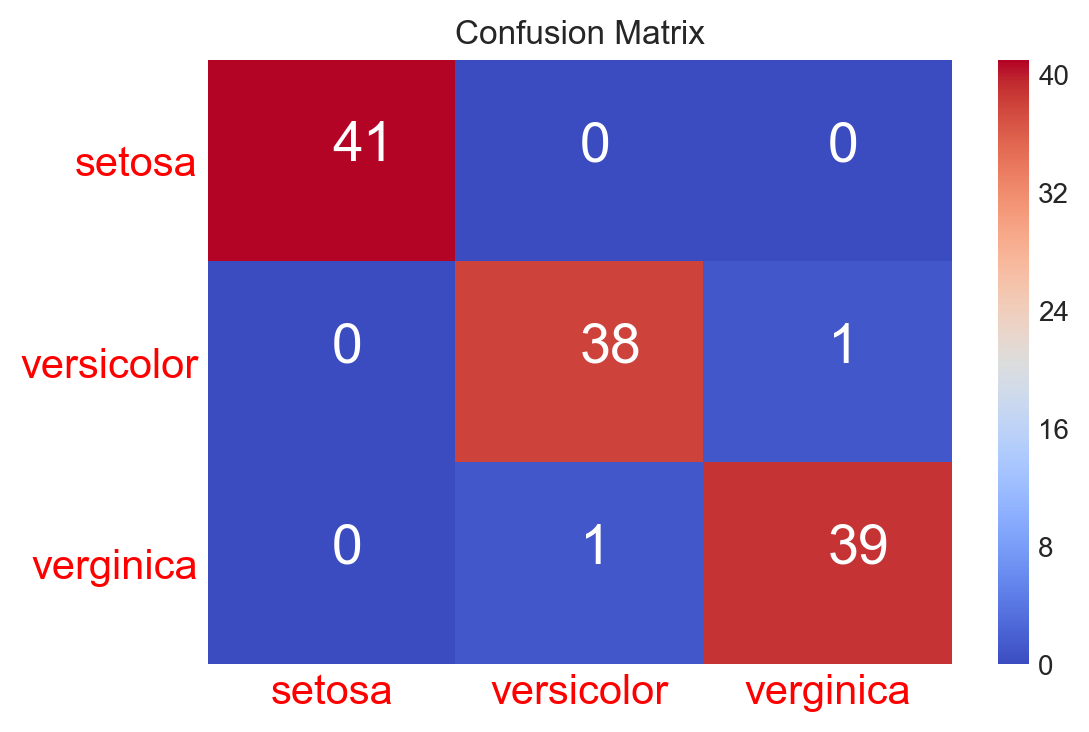

In [154]:
plt.figure(dpi=200)
plt.title("Confusion Matrix")
sns.heatmap(cnf, cmap='coolwarm')
plt.xticks(fontsize=15, color='red')
plt.yticks(fontsize=15, color='red', rotation=0)
for i in range(0, 3):
    for j in range(0, 3):
        plt.text(i+0.5, j+0.5, cnf.iloc[i, j], color='white', fontsize=20)
plt.show()

### Major Project Movie Recommandation 

### K-Nearest Neighbour Algorithm

#### Today's Assignment 

### Create a application to predict a transition is Fraud or Not

#### check kaggle or other data resources to find a fraud dataset in banking or fincial institutes

__credit card fraud detection__

__predict quality of wine using wine dataset__

In [162]:
from sklearn.datasets import load_wine

In [164]:
load_wine()['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [166]:
load_wine()['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')